# Быстрый старт в анализ данных

**с помощью `Pandas` и `Scikit-learn`,**
**а также `numpy` и `matplotlib`**

- `numpy` – матричные операции
- `matplotlib` – научная графика
- `pandas` – таблицы (DataFrame) для анализа данных
- `scikit-learn` – алгоритмы машинного обучения




In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import folium
import geopandas as gdp
from folium.plugins import HeatMap
%matplotlib inline

In [108]:
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
#data = pd.read_csv(url, sep = ', ', engine='python')
data = pd.read_csv('accidents_2005_to_2007.csv', engine = 'python')

In [57]:
type(data)

pandas.core.frame.DataFrame

In [58]:
data

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570006,2.01E+12,322650.0,566300.0,-3.210294,54.985289,98,3,1,1,20/12/2007,...,No physical crossing within 50 meters,Darkeness: No street lighting,Other,Frost/Ice,None,None,2,Yes,NaN,2007
570007,2.01E+12,323710.0,566150.0,-3.193693,54.984105,98,2,1,2,21/12/2007,...,No physical crossing within 50 meters,Daylight: Street light present,Other,Frost/Ice,None,None,2,Yes,NaN,2007
570008,2.01E+12,336900.0,586230.0,-2.992068,55.166369,98,3,1,1,23/12/2007,...,No physical crossing within 50 meters,Darkeness: No street lighting,Fog or mist,Frost/Ice,None,None,2,Yes,NaN,2007
570009,2.01E+12,332390.0,567240.0,-3.058338,54.995154,98,3,1,1,23/12/2007,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,None,None,2,No,NaN,2007


In [59]:
print(data)

       Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0       200501BS00001               525680.0                178240.0   
1       200501BS00002               524170.0                181650.0   
2       200501BS00003               524520.0                182240.0   
3       200501BS00004               526900.0                177530.0   
4       200501BS00005               528060.0                179040.0   
...               ...                    ...                     ...   
570006       2.01E+12               322650.0                566300.0   
570007       2.01E+12               323710.0                566150.0   
570008       2.01E+12               336900.0                586230.0   
570009       2.01E+12               332390.0                567240.0   
570010       2.01E+12               314040.0                579740.0   

        Longitude   Latitude  Police_Force  Accident_Severity  \
0       -0.191170  51.489096             1                  2   
1    

In [60]:
data.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [61]:
data.tail()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
570006,2.01E+12,322650.0,566300.0,-3.210294,54.985289,98,3,1,1,20/12/2007,...,No physical crossing within 50 meters,Darkeness: No street lighting,Other,Frost/Ice,None,None,2,Yes,NaN,2007
570007,2.01E+12,323710.0,566150.0,-3.193693,54.984105,98,2,1,2,21/12/2007,...,No physical crossing within 50 meters,Daylight: Street light present,Other,Frost/Ice,None,None,2,Yes,NaN,2007
570008,2.01E+12,336900.0,586230.0,-2.992068,55.166369,98,3,1,1,23/12/2007,...,No physical crossing within 50 meters,Darkeness: No street lighting,Fog or mist,Frost/Ice,None,None,2,Yes,NaN,2007
570009,2.01E+12,332390.0,567240.0,-3.058338,54.995154,98,3,1,1,23/12/2007,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,None,None,2,No,NaN,2007
570010,2.01E+12,314040.0,579740.0,-3.348857,55.104618,98,2,2,2,22/12/2007,...,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Frost/Ice,None,None,2,Yes,NaN,2007


- `Accident_Index`, 
- `Location_Easting_OSGR`,
- `Location_Northing_OSGR`,
- `Longitude`,
- `Latitude`,
- `Police_Force`, 
- `Accident_Severity`,
- `Number_of_Vehicles`,
- `Number_of_Casualties`,
- `Date`,
- `Day_of_Week`,
- `Time`,
- `Local_Authority_(District)`,
- `Local_Authority_(Highway)`,
- `1st_Road_Class`, 
- `1st_Road_Number`,
- `Road_Type`, 
- `Speed_limit`,
- `Junction_Detail`, 
- `Junction_Control`,
- `2nd_Road_Class`,
- `2nd_Road_Number`,
- `Pedestrian_Crossing-Human_Control`,
- `Pedestrian_Crossing-Physical_Facilities`,
- `Light_Conditions`,
- `Weather_Conditions`,
- `Road_Surface_Conditions`,
- `Special_Conditions_at_Site`,
- `Carriageway_Hazards`,
- `Urban_or_Rural_Area`,
- `Did_Police_Officer_Attend_Scene_of_Accident`,
- `LSOA_of_Accident_Location`,
- `Year`


In [62]:
print(data.shape)
print(data.columns)

(570011, 33)
Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')


In [63]:
data.index

RangeIndex(start=0, stop=570011, step=1)

In [64]:
data.at[2, 'Year']

2005

In [65]:
data['Speed_limit']

0         30
1         30
2         30
3         30
4         30
          ..
570006    60
570007    40
570008    60
570009    30
570010    60
Name: Speed_limit, Length: 570011, dtype: int64

In [66]:
data['Urban_or_Rural_Area'][3]

1

In [67]:
data['1st_Road_Number'].dtype.name

'int64'

In [68]:
type(data['Location_Easting_OSGR'][3])

numpy.float64

In [69]:
type(data['Junction_Control'])

pandas.core.series.Series

In [70]:
data[['Weather_Conditions', 'Road_Surface_Conditions']].head()

,Weather_Conditions,Road_Surface_Conditions
0,Raining without high winds,Wet/Damp
1,Fine without high winds,Dry
2,Fine without high winds,Dry
3,Fine without high winds,Dry
4,Fine without high winds,Wet/Damp


In [71]:
#data.index = xrange(570011)
data.index

RangeIndex(start=0, stop=570011, step=1)

In [72]:
data.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,Junction_Detail,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,569910.000000,5.699100e+05,569910.000000,569910.000000,570011.000000,570011.000000,570011.000000,570011.000000,570011.000000,570011.000000,570011.000000,570011.000000,570011.000000,0.0,570011.000000,570011.000000,570011.000000,570011.000000
mean,435609.680423,3.017252e+05,-1.494988,52.603655,31.205219,2.839647,1.840773,1.363484,4.124371,358.870490,4.107094,1001.977992,39.788329,NaN,2.588634,379.357298,1.367330,2005.970843
std,95639.717128,1.613470e+05,1.406187,1.452752,25.516761,0.405771,0.722930,0.823950,1.932537,258.233842,1.446774,1832.143128,14.474087,NaN,3.221140,1306.844752,0.482558,0.816882
min,64980.000000,1.052000e+04,-7.515933,49.914513,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,10.000000,NaN,-1.000000,-1.000000,1.000000,2005.000000
25%,371020.000000,1.787400e+05,-2.434639,51.494892,7.000000,3.000000,1.000000,1.000000,2.000000,126.000000,3.000000,0.000000,30.000000,NaN,-1.000000,0.000000,1.000000,2005.000000
50%,435490.000000,2.773850e+05,-1.470388,52.388312,31.000000,3.000000,2.000000,1.000000,4.000000,340.000000,4.000000,112.000000,30.000000,NaN,3.000000,0.000000,1.000000,2006.000000
75%,519230.000000,3.982800e+05,-0.267764,53.480015,46.000000,3.000000,2.000000,1.000000,6.000000,536.000000,6.000000,694.000000,60.000000,NaN,6.000000,0.000000,2.000000,2007.000000
max,655290.000000,1.208800e+06,1.758337,60.757544,98.000000,3.000000,28.000000,68.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,NaN,6.000000,9999.000000,3.000000,2007.000000


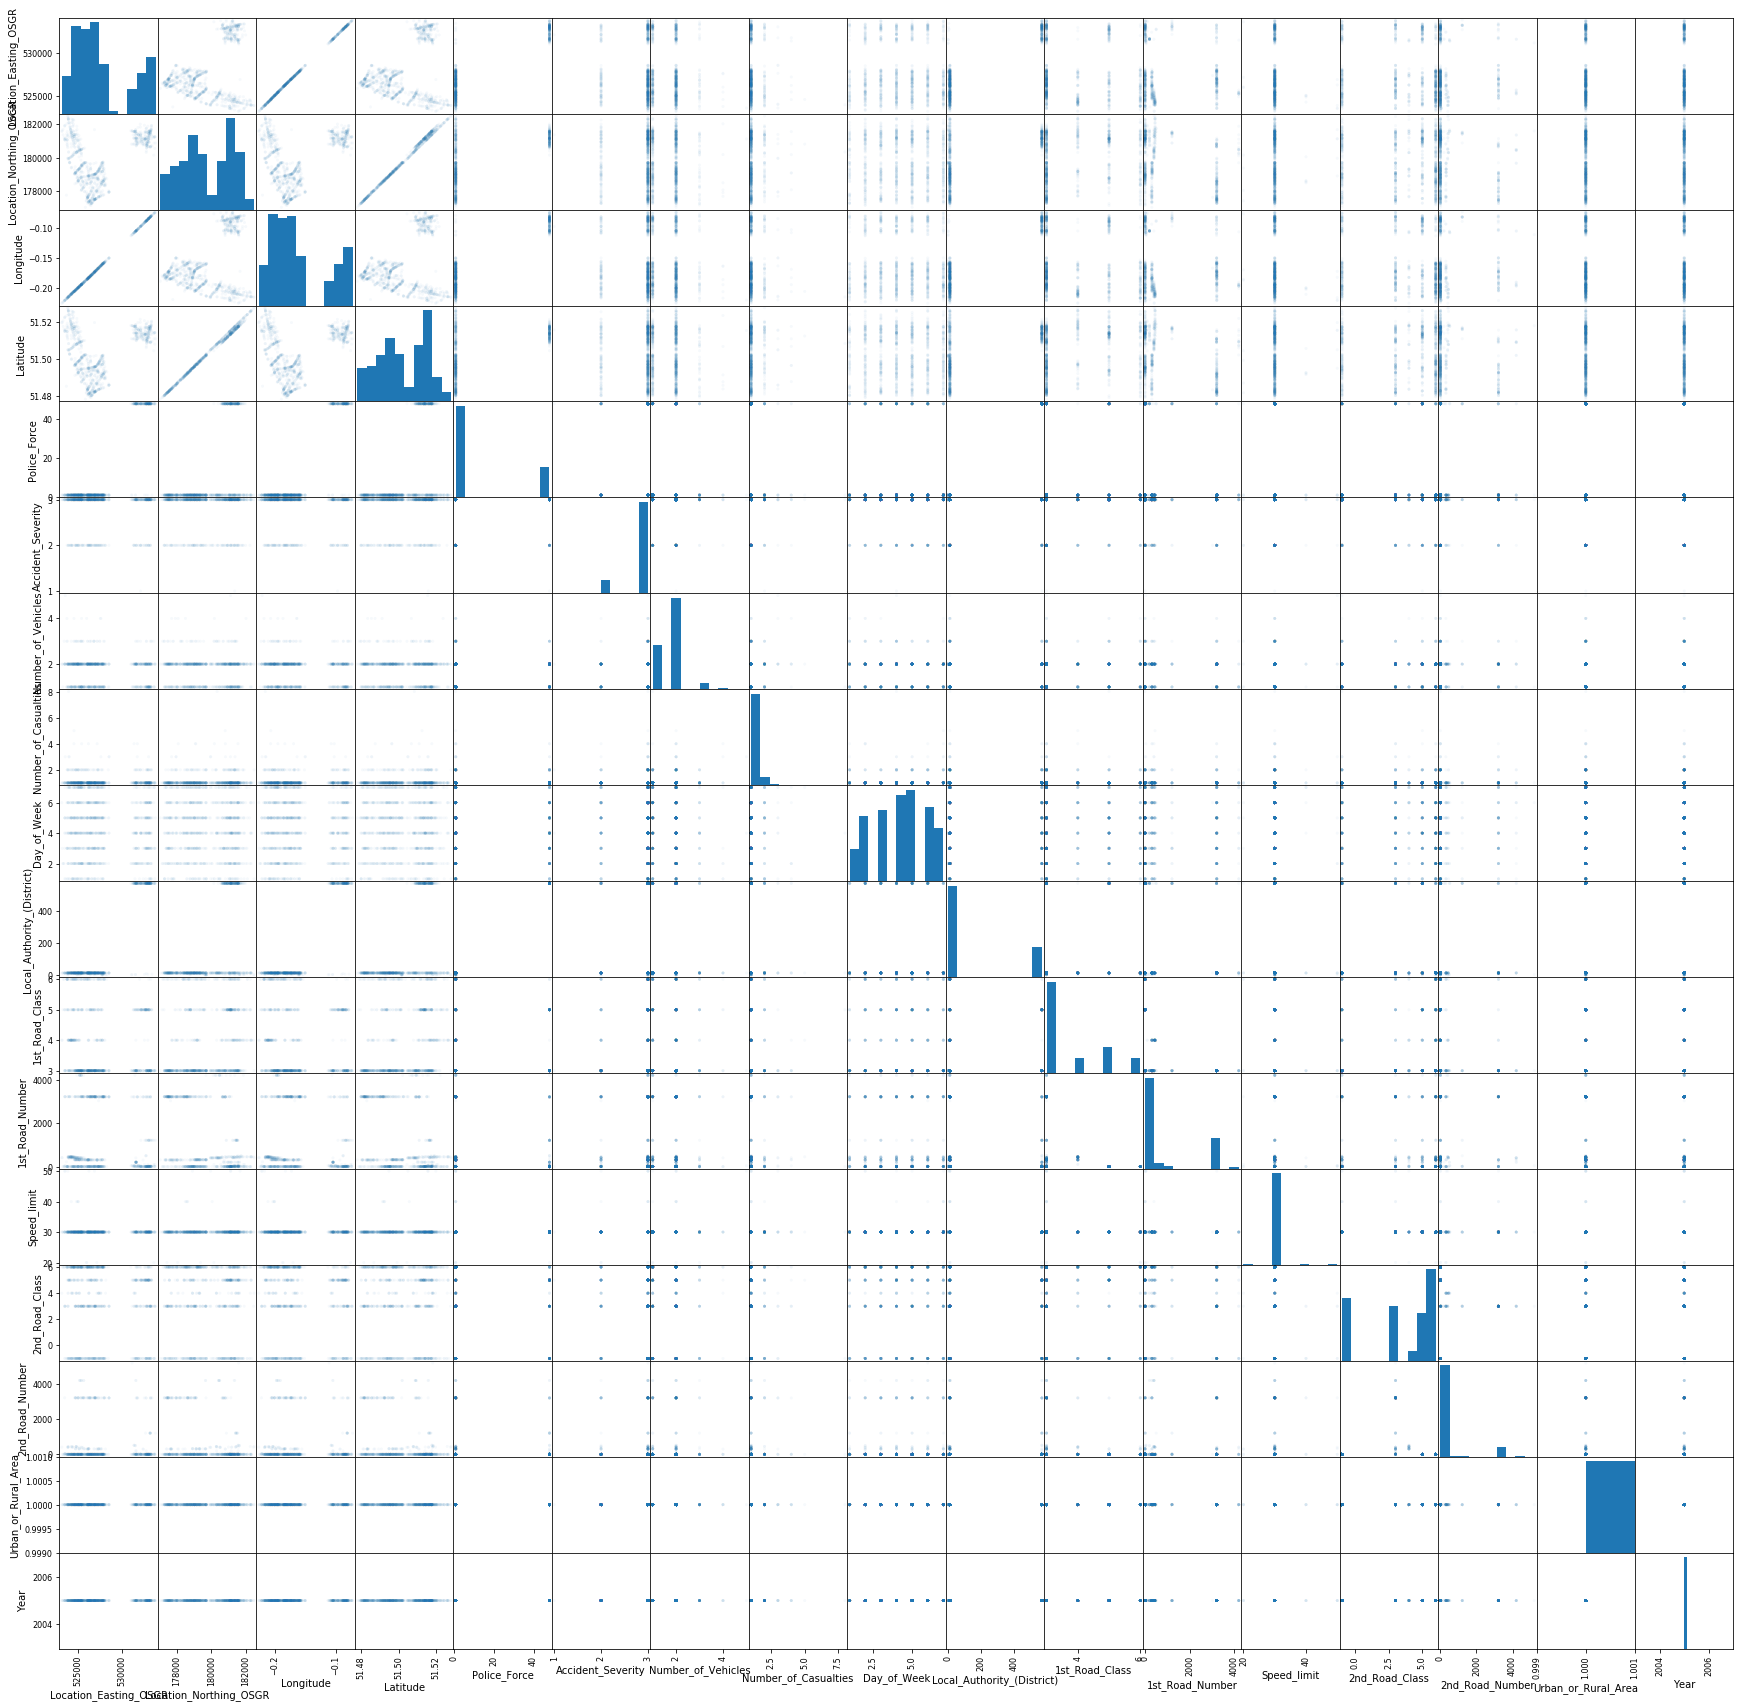

In [73]:
from pandas.plotting import scatter_matrix
data = data.dropna(axis=1, how='all')
scatter_matrix(data[:1000], alpha = .04, figsize = (30, 30))
pass

In [74]:
data[:1000].corr()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
Location_Easting_OSGR,1.000000,0.364228,0.999944,0.315068,0.910807,-0.016447,-0.081999,-0.022539,-0.011934,0.910065,-0.059560,-0.106410,-0.084362,-0.086043,-0.030814,NaN,NaN
Location_Northing_OSGR,0.364228,1.000000,0.374086,0.998634,0.583100,0.007029,-0.057747,0.043662,-0.022644,0.581806,0.227342,-0.403367,0.031276,-0.007305,-0.198259,NaN,NaN
Longitude,0.999944,0.374086,1.000000,0.325118,0.913635,-0.016303,-0.082316,-0.021942,-0.012146,0.912882,-0.056738,-0.110573,-0.083642,-0.085766,-0.032941,NaN,NaN
Latitude,0.315068,0.998634,0.325118,1.000000,0.543070,0.008070,-0.054259,0.045746,-0.022396,0.541792,0.235036,-0.405114,0.036590,-0.002599,-0.200333,NaN,NaN
Police_Force,0.910807,0.583100,0.913635,0.543070,1.000000,-0.018542,-0.066997,0.014955,-0.033100,0.999971,0.007039,-0.189195,-0.050961,-0.080147,-0.075709,NaN,NaN
Accident_Severity,-0.016447,0.007029,-0.016303,0.008070,-0.018542,1.000000,0.067853,0.003101,-0.030943,-0.018432,0.061375,-0.010462,0.007955,0.046702,-0.021342,NaN,NaN
Number_of_Vehicles,-0.081999,-0.057747,-0.082316,-0.054259,-0.066997,0.067853,1.000000,0.058810,-0.084730,-0.066788,-0.038304,0.021753,0.070292,0.089445,0.013438,NaN,NaN
Number_of_Casualties,-0.022539,0.043662,-0.021942,0.045746,0.014955,0.003101,0.058810,1.000000,0.015423,0.015130,-0.025547,-0.007272,0.046184,-0.034295,0.030607,NaN,NaN
Day_of_Week,-0.011934,-0.022644,-0.012146,-0.022396,-0.033100,-0.030943,-0.084730,0.015423,1.000000,-0.032954,-0.005225,-0.023777,0.012215,-0.022699,0.022234,NaN,NaN
Local_Authority_(District),0.910065,0.581806,0.912882,0.541792,0.999971,-0.018432,-0.066788,0.015130,-0.032954,1.000000,0.007200,-0.188836,-0.051482,-0.079904,-0.075702,NaN,NaN


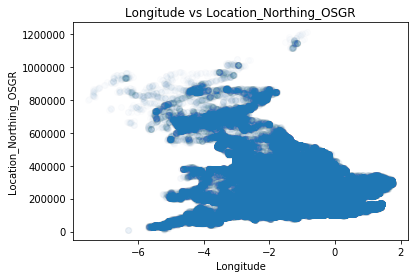

In [75]:
plt.plot(data['Longitude'], data['Location_Northing_OSGR'], 'o', alpha = 0.01)
plt.xlabel('Longitude')
plt.ylabel('Location_Northing_OSGR')
plt.title('Longitude vs Location_Northing_OSGR')
pass

In [76]:
data['Number_of_Vehicles'] < 3

0         True
1         True
2         True
3         True
4         True
          ... 
570006    True
570007    True
570008    True
570009    True
570010    True
Name: Number_of_Vehicles, Length: 570011, dtype: bool

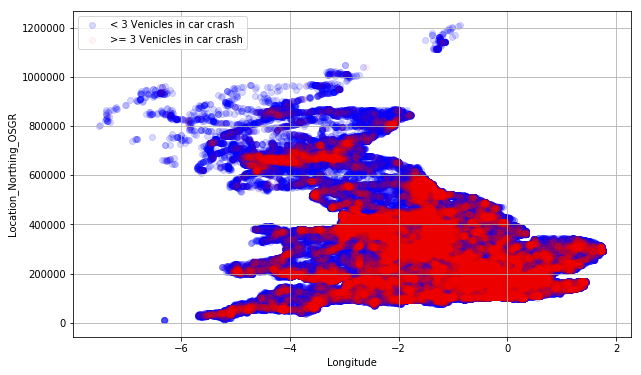

In [77]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['Number_of_Vehicles'] < 3]['Longitude'],
            data[data['Number_of_Vehicles'] < 3]['Location_Northing_OSGR'],
            alpha = 0.15,
            label = '< 3 Venicles in car crash',
            color = 'b')

plt.scatter(data[data['Number_of_Vehicles'] >= 3]['Longitude'],
            data[data['Number_of_Vehicles'] >= 3]['Location_Northing_OSGR'],
            alpha = 0.05,
            label = '>= 3 Venicles in car crash',
            color = 'r')

plt.xlabel('Longitude')
# plt.xticks(range(18))
# plt.xlim(0, 17)
plt.ylabel('Location_Northing_OSGR')
plt.legend()
plt.grid()

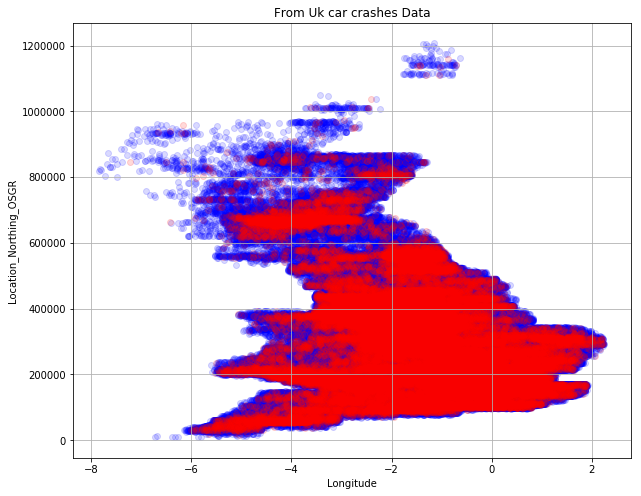

In [78]:
np.random.seed(0)
longitude_num_rnd = data['Longitude'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(longitude_num_rnd[data['Number_of_Vehicles'] < 3],
            data[data['Number_of_Vehicles'] < 3]['Location_Northing_OSGR'],
            alpha = 0.15,
            label = '< 3 Venicles in car crash',
            color = 'b')

plt.scatter(longitude_num_rnd[data['Number_of_Vehicles'] >= 3],
            data[data['Number_of_Vehicles'] >= 3]['Location_Northing_OSGR'],
            alpha = 0.15,
            label = '>= 3 Venicles in car crash',
            color = 'r')

plt.xlabel('Longitude')
# plt.xticks(range(17))
# plt.xlim(0, 17)
plt.ylabel('Location_Northing_OSGR')
plt.title('From Uk car crashes Data')
plt.grid()

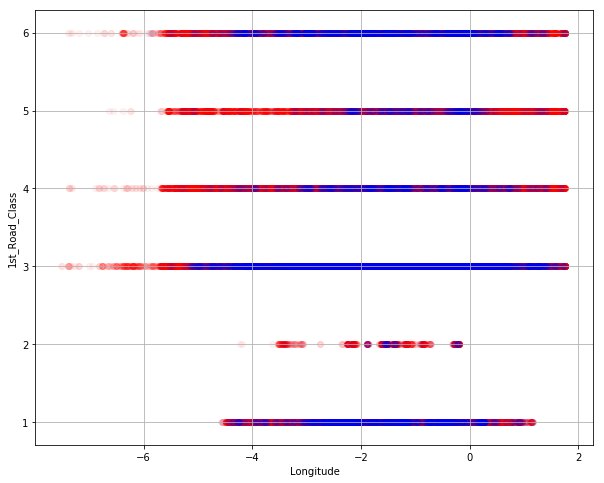

In [79]:
plt.figure(figsize = (10, 8))

plt.scatter(data[data['Number_of_Vehicles'] < 3]['Longitude'],
            data[data['Number_of_Vehicles'] < 3]['1st_Road_Class'],
            alpha = 0.05,
            label = '< 3 Venicles in car crash',
            color = 'r')

plt.scatter(data[data['Number_of_Vehicles'] > 3]['Longitude'],
            data[data['Number_of_Vehicles'] > 3]['1st_Road_Class'],
            alpha = 0.05,
            label = '>= 3 Venicles in car crash',
            color = 'b')

plt.xlabel('Longitude')
plt.ylabel('1st_Road_Class')
plt.grid()

In [80]:
data.describe(include = ['object'])

,Accident_Index,Date,Time,Local_Authority_(Highway),Road_Type,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
count,570011,570011,569944,570011,570011,333066,569994,569977,570011,569991,569349,570000,569988,567636,522500
unique,366193,1095,1439,207,6,4,3,6,5,9,5,8,6,2,33773
top,2.01E+12,21/10/2005,17:00,E10000016,Single carriageway,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,Yes,E01000004
freq,203663,822,5500,14383,423414,271570,566636,486482,414282,454074,389897,555325,558858,459311,892


In [81]:
data.describe(include = 'all')

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
count,570011,569910.000000,5.699100e+05,569910.000000,569910.000000,570011.000000,570011.000000,570011.000000,570011.000000,570011,...,569977,570011,569991,569349,570000,569988,570011.000000,567636,522500,570011.000000
unique,366193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1095,...,6,5,9,5,8,6,NaN,2,33773,NaN
top,2.01E+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21/10/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,NaN,Yes,E01000004,NaN
freq,203663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,822,...,486482,414282,454074,389897,555325,558858,NaN,459311,892,NaN
mean,NaN,435609.680423,3.017252e+05,-1.494988,52.603655,31.205219,2.839647,1.840773,1.363484,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.367330,NaN,NaN,2005.970843
std,NaN,95639.717128,1.613470e+05,1.406187,1.452752,25.516761,0.405771,0.722930,0.823950,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.482558,NaN,NaN,0.816882
min,NaN,64980.000000,1.052000e+04,-7.515933,49.914513,1.000000,1.000000,1.000000,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,2005.000000
25%,NaN,371020.000000,1.787400e+05,-2.434639,51.494892,7.000000,3.000000,1.000000,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,2005.000000
50%,NaN,435490.000000,2.773850e+05,-1.470388,52.388312,31.000000,3.000000,2.000000,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,2006.000000
75%,NaN,519230.000000,3.982800e+05,-0.267764,53.480015,46.000000,3.000000,2.000000,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,2007.000000


In [82]:
data['Number_of_Vehicles'].unique()

array([ 1,  2,  4,  3,  5,  6,  8,  7, 13, 10, 11, 18,  9, 20, 17, 15, 12,
       14, 22, 16, 28])

In [83]:
data['Day_of_Week'].unique()

array([3, 4, 5, 6, 2, 7, 1])

In [84]:
for name in data['Number_of_Vehicles'].unique():
    print(name, data['Number_of_Vehicles'][data['Day_of_Week'] == name])

1 10        1
26        2
37        2
48        2
59        1
         ..
569990    2
569997    1
570002    1
570008    1
570009    1
Name: Number_of_Vehicles, Length: 63739, dtype: int64
2 4         1
20        1
21        2
22        2
41        2
         ..
569976    2
569981    2
569998    1
570003    2
570004    2
Name: Number_of_Vehicles, Length: 80207, dtype: int64
4 1         1
25        1
29        2
44        2
53        2
         ..
569965    2
569967    1
569979    2
569993    2
570005    2
Name: Number_of_Vehicles, Length: 85781, dtype: int64
3 0         1
5         2
11        2
12        1
13        2
         ..
569986    2
569987    1
569991    1
569992    1
569994    1
Name: Number_of_Vehicles, Length: 83488, dtype: int64
5 2         2
6         2
16        2
31        2
33        2
         ..
569971    1
569988    1
569995    2
569999    2
570006    1
Name: Number_of_Vehicles, Length: 85191, dtype: int64
6 3         1
7         1
17        2
18        2
40        

In [85]:
data['Speed_limit'].unique()

array([30, 40, 50, 20, 60, 70, 10, 15])

## Задача

- Из `Date` и `Year` оставим только `Year`
- `Accident_Index` уберём также из таблицы, поскольку нам не важен порядковый номер
- `LSOA_of_Accident_Location` прнимает слишком большое количество значений для категориального признака, уберём его так же

In [112]:
# data = data.drop('Date', axis = 1).drop('LSOA_of_Accident_Location', axis = 1).drop('Accident_Index', axis = 1)
data

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,3,17:42,...,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,2005
1,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,4,17:36,...,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005
2,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,5,00:15,...,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005
3,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,6,10:35,...,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2005
4,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,2,21:13,...,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570006,322650.0,566300.0,-3.210294,54.985289,98,3,1,1,5,22:01,...,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Other,Frost/Ice,None,None,2,Yes,2007
570007,323710.0,566150.0,-3.193693,54.984105,98,2,1,2,6,13:12,...,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Other,Frost/Ice,None,None,2,Yes,2007
570008,336900.0,586230.0,-2.992068,55.166369,98,3,1,1,1,03:07,...,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fog or mist,Frost/Ice,None,None,2,Yes,2007
570009,332390.0,567240.0,-3.058338,54.995154,98,3,1,1,1,20:00,...,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,None,None,2,No,2007


# Готовим данные

In [113]:
data['Location_Easting_OSGR'].dtype.name

'float64'

In [114]:
data['Road_Surface_Conditions'].dtype.name

'object'

In [115]:
#categorical_columns = []
#numerical_columns = []
#for c in data.columns:
#    if data[c].dtype.name == 'object':
#        categorical_columns.append(c)
#    else:
#        numerical_columns.append(c)          

In [116]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['Time', 'Local_Authority_(Highway)', 'Road_Type', 'Junction_Control', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Did_Police_Officer_Attend_Scene_of_Accident']
['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week', 'Local_Authority_(District)', '1st_Road_Class', '1st_Road_Number', 'Speed_limit', 'Junction_Detail', '2nd_Road_Class', '2nd_Road_Number', 'Urban_or_Rural_Area', 'Year']


In [117]:
for c in categorical_columns:
    print(c, data[c].unique())

Time ['17:42' '17:36' '00:15' ... '05:57' '04:26' '01:57']
Local_Authority_(Highway) ['E09000020' 'E09000033' 'E09000013' 'E09000001' 'E09000030' 'E09000028'
 'E09000012' 'E09000019' 'E09000007' 'E09000022' 'E09000005' 'E09000014'
 'E09000003' 'E09000009' 'E09000027' 'E09000031' 'E09000025' 'EHEATHROW'
 'E09000017' 'E09000015' 'E09000018' 'E09000010' 'E09000026' 'E09000002'
 'E09000016' 'E09000008' 'E09000032' 'E09000029' 'E09000023' 'E09000006'
 'E09000011' 'E09000004' 'E09000021' 'E09000024' 'E10000006' 'E06000009'
 'E10000017' 'E06000008' 'E08000015' 'E08000014' 'E08000012' 'E08000011'
 'E08000013' 'E08000003' 'E08000004' 'E08000006' 'E08000002' 'E08000005'
 'E08000009' 'E08000008' 'E08000007' 'E08000010' 'E08000001' 'E06000050'
 'E06000007' 'E06000006' 'E06000049' 'E08000021' 'E08000024' 'E08000022'
 'E06000048' 'E08000020' 'E08000023' 'E06000047' 'E06000005' 'E06000014'
 'E10000023' 'E08000035' 'E08000033' 'E08000032' 'E08000034' 'E08000036'
 'E08000017' 'E08000018' 'E08000016' 'E

## Обрабатываем пропущенные значения

Если данные содержат пропущенные значения, то имеется две простые альтернативы:
- удалить столбцы с такими значениями (`data = data.dropna(axis = 1)`),
- удалить строки с такими значениями (`data = data.dropna(axis = 0)`).

После этого данных может стать совсем мало.

Куда более эффективным (и в то же время по-прежнему простым) методом обычно является заполнение пропущенных значений для каждой количественной переменной их средним или медианным значением. 
Для категориальных признаков пропущенные значения можно заполнить самым популярным значением в столбце.

In [118]:
data.median(axis = 0)

/home/fedor/.local/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1112: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Location_Easting_OSGR         435490.000000
Location_Northing_OSGR        277385.000000
Longitude                         -1.470388
Latitude                          52.388312
Police_Force                      31.000000
Accident_Severity                  3.000000
Number_of_Vehicles                 2.000000
Number_of_Casualties               1.000000
Day_of_Week                        4.000000
Local_Authority_(District)       340.000000
1st_Road_Class                     4.000000
1st_Road_Number                  112.000000
Speed_limit                       30.000000
Junction_Detail                         NaN
2nd_Road_Class                     3.000000
2nd_Road_Number                    0.000000
Urban_or_Rural_Area                1.000000
Year                            2006.000000
dtype: float64

In [119]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [120]:
data[numerical_columns].count(axis = 0)

Location_Easting_OSGR         570011
Location_Northing_OSGR        570011
Longitude                     570011
Latitude                      570011
Police_Force                  570011
Accident_Severity             570011
Number_of_Vehicles            570011
Number_of_Casualties          570011
Day_of_Week                   570011
Local_Authority_(District)    570011
1st_Road_Class                570011
1st_Road_Number               570011
Speed_limit                   570011
Junction_Detail                    0
2nd_Road_Class                570011
2nd_Road_Number               570011
Urban_or_Rural_Area           570011
Year                          570011
dtype: int64

In [121]:
data[categorical_columns].count(axis = 0)

Time                                           569944
Local_Authority_(Highway)                      570011
Road_Type                                      570011
Junction_Control                               333066
Pedestrian_Crossing-Human_Control              569994
Pedestrian_Crossing-Physical_Facilities        569977
Light_Conditions                               570011
Weather_Conditions                             569991
Road_Surface_Conditions                        569349
Special_Conditions_at_Site                     570000
Carriageway_Hazards                            569988
Did_Police_Officer_Attend_Scene_of_Accident    567636
dtype: int64

In [122]:
data['Light_Conditions'].describe()

count                             570011
unique                                 5
top       Daylight: Street light present
freq                              414282
Name: Light_Conditions, dtype: object

In [123]:
type(data['Light_Conditions'].describe())

pandas.core.series.Series

In [124]:
data['Light_Conditions'].describe().top

'Daylight: Street light present'

In [125]:
data['Light_Conditions'] = data['Light_Conditions'].fillna('Daylight: Street light present')

In [126]:
data.describe(include = [object])

,Time,Local_Authority_(Highway),Road_Type,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Did_Police_Officer_Attend_Scene_of_Accident
count,569944,570011,570011,333066,569994,569977,570011,569991,569349,570000,569988,567636
unique,1439,207,6,4,3,6,5,9,5,8,6,2
top,17:00,E10000016,Single carriageway,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,Yes
freq,5500,14383,423414,271570,566636,486482,414282,454074,389897,555325,558858,459311


In [127]:
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [128]:
data.describe(include = [object])

,Time,Local_Authority_(Highway),Road_Type,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Did_Police_Officer_Attend_Scene_of_Accident
count,570011,570011,570011,570011,570011,570011,570011,570011,570011,570011,570011,570011
unique,1439,207,6,4,3,6,5,9,5,8,6,2
top,17:00,E10000016,Single carriageway,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,Yes
freq,5567,14383,423414,508515,566653,486516,414282,454094,390559,555336,558881,461686


## Векторизация

Нужно что-то сделать с категориальными (номинальными) признаками

In [129]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['Did_Police_Officer_Attend_Scene_of_Accident'] ['Time', 'Local_Authority_(Highway)', 'Road_Type', 'Junction_Control', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards']


In [130]:
data['Did_Police_Officer_Attend_Scene_of_Accident'].unique()

array(['Yes', 'No'], dtype=object)

In [131]:
data.at[data['Did_Police_Officer_Attend_Scene_of_Accident'] == 'No', 'Did_Police_Officer_Attend_Scene_of_Accident'] = 0
data.at[data['Did_Police_Officer_Attend_Scene_of_Accident'] == 'Yes', 'Did_Police_Officer_Attend_Scene_of_Accident'] = 1
result = data['Did_Police_Officer_Attend_Scene_of_Accident'].describe
result

<bound method NDFrame.describe of 0         1
1         1
2         1
3         1
4         1
         ..
570006    1
570007    1
570008    1
570009    0
570010    1
Name: Did_Police_Officer_Attend_Scene_of_Accident, Length: 570011, dtype: int64>

К небинарными признакам применим метод _векторизации_, 
который заключается в следующем.

Признак `j`, принимающий `s` значений, заменим на `s` признаков, принимащих значения `0` или `1`,
в зависимости от того, чему равно значение исходного признака `j`.

Например, в нашей задаче признак `race` принимает 5 различных значений: 

In [132]:
data['Weather_Conditions'].unique()

array(['Raining without high winds', 'Fine without high winds', 'Unknown',
       'Snowing without high winds', 'Other', 'Fine with high winds',
       'Raining with high winds', 'Fog or mist',
       'Snowing with high winds'], dtype=object)

Заменим признак `Weather_Conditions` 7 признаками: `Raining without high winds`, `Fine without high winds`, ..., `Other`.

 - Если признак `Weather_Conditions` принимает значение `Raining without high winds`, то признак `Raining without high winds` равен `1`, а все остальные равны `0`.
 - Если признак `race` принимает значение `Fine without high winds`, то признак `Fine without high winds` равен `1`, а все остальные равны `0`.
 - и т.д.

Такую векторизацию осуществляет в pandas метод `get_dummies`:

In [133]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Time_00:01', 'Time_00:02', 'Time_00:03', 'Time_00:04', 'Time_00:05',
       'Time_00:06', 'Time_00:07', 'Time_00:08', 'Time_00:09', 'Time_00:10',
       ...
       'Special_Conditions_at_Site_Ol or diesel',
       'Special_Conditions_at_Site_Permanent sign or marking defective or obscured',
       'Special_Conditions_at_Site_Road surface defective',
       'Special_Conditions_at_Site_Roadworks',
       'Carriageway_Hazards_Any animal (except a ridden horse)',
       'Carriageway_Hazards_Dislodged vehicle load in carriageway',
       'Carriageway_Hazards_Involvement with previous accident',
       'Carriageway_Hazards_None',
       'Carriageway_Hazards_Other object in carriageway',
       'Carriageway_Hazards_Pedestrian in carriageway (not injured)'],
      dtype='object', length=1698)


## Нормализация количественных признаков

Многие алгоритмы машинного обучения чувствительны к масштабированию данных.
К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно _нормализовать_.
Это можно делать разными способами.
Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [ ]:
data_numerical = data[numerical_columns]
data_numerical.describe()

In [ ]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [ ]:
data_numerical.describe()

## Соединяем все в одну таблицу

In [ ]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)
#print data.columns

In [ ]:
data.describe()

# X и y

In [ ]:
X = data.drop(('class'), axis = 1) # выбрасываем столбец 'class'
y = data['class']
feature_names = X.columns


In [ ]:
type(feature_names)

In [ ]:
feature_names

In [ ]:
print(X.shape)
print(y.shape)
N, d = X.shape

In [ ]:
type(X)

In [ ]:
type(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

In [ ]:
22792+9769

In [ ]:
#data_drop = data.drop('capital-gain',   axis = 1)\
#                .drop('capital-loss',   axis = 1)\
#                .drop('education',      axis = 1)\
#                .drop('fnlwgt',         axis = 1)\
#                .drop('workclass',      axis = 1)\
#                .drop('race',           axis = 1)\
#                .drop('sex',            axis = 1)\
#                .drop('native-country', axis = 1)\
#                .drop('class',          axis = 1)    

В библиотеке scikit-learn реализована масса алгоритмов машинного обучения.

#### Некоторые алгоритмы машинного обучения, реализованные в scikit-learn:

 Метод                                     |  Класс
-------------------------------------------|--------------------------------------------         
 kNN – $k$ ближайших соседей               | `sklearn.neighbors.KNeighborsClassifier`
 LDA – линейный дискриминантный анализ     | `sklearn.discriminant_analysis.LinearDiscriminantAnalysis`
 QDA – квадратичный дискриминантный анализ | `sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis`
 Logistic – логистическая регрессия        | `sklearn.linear_model.LogisticRegression`
 SVC – машина опорных векторов             | `sklearn.svm.SVC`
 Tree – деревья решений                    | `sklearn.tree.DecisionTreeClassifier`
 RF – случайный лес                        | `sklearn.ensemble.RandomForestClassifier`
 ExtrRF – экстремально случайный лес       | ` `
 AdaBoost – алгоритм AdaBoost              | `sklearn.ensemble.AdaBoostClassifier`
 GBT – градиентный бустинг деревьев решений| `sklearn.ensemble.GradientBoostingClassifier`
 Нейронные сети                            | ` `
 



#### Основные методы классов, реализующих алгоритмы машинного обучения
Все алгоритмы выполнены в виде классов, обладающих по крайней мере следующими методами:



   Метод класса            |  Описание     
 --------------------------|-------------------------------------------------------------
  `fit(X_train, y_train)`              |  обучение (тренировка) модели на обучающей выборке `X_train`, `y_train`
  `predict(X)`             |  предсказание на данных `X`
  `set_params(**params)`   |  установка параметров алгоритма
  `get_params()`           |  чтение параметров алгоритма
 
 Заметим, что параметры алгоритмов обучения можно задавать как в конструкторе класса, так и с помощью метода `set_params(**params)`.
 
 #### Таблица наличия/отсутствия методов для основных алгоритмов машинного обучения:
 
    
   Методы класса               | kNN | LDA | QDA | Logistic | SVC | Tree | RF | AdaBoost | GBT     
 ------------------------------|-----|-----|-----|----------|-----|------|----|----------|------
  `fit(X, y)`                  |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `predict(X)`                 |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `predict_proba(X)`           |  +  |  +  |  +  |    +     |     |  +   | +  |    +     |  +
  `predict_log_proba(X)`       |     |  +  |  +  |    +     |     |  +   | +  |    +     |  +
  `score(X, y)`                |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `decision_function(X)`       |     |  +  |  +  |    +     |  +  |      |    |    +     |  +
  `transform(X)`               |     |  +  |     |    +     |     |  +   | +  |          |  +
  `staged_decision_function(X)`|     |     |     |          |     |      |    |    +     |  +    
  `staged_predict(X)`          |     |     |     |          |     |      |    |    +     |  +
  `staged_predict_proba(X)`    |     |     |     |          |     |      |    |    +     |  +
  `staged_score(X, y)`         |     |     |     |          |     |      |    |    +     |  +
  `set_params(**params)`       |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `get_params()`               |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
    
    

# $k$NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

In [ ]:
knn

In [ ]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

In [ ]:
err_test = 1 - knn.score(X_test, y_test) # Другой способ

In [ ]:
err_test

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

In [ ]:
confusion_matrix([0,1,0,1,0], [0,1,0,0,0])

### Подбор параметров

In [ ]:
# Долго!
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

# SVC

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

### Подбор параметров

In [ ]:
from sklearn.grid_search import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC()
grid = GridSearchCV(svc, param_grid = {'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

In [ ]:
svc = SVC(C = best_C).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

# Random Forest

In [ ]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

### Значимость признаков

In [ ]:
a=[1,2,5,70,32,3,4,7,234, 3]
a[-1:3:-1]

In [ ]:
np.sum(rf.feature_importances_)

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))   

In [ ]:
feature_names[[1,0,1]]

In [ ]:
d_first = 20
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

Использование только признаков
`age`, `hourse-per-week`, `education-num`, `marital-status`, `relationship`, `occupation`
существенно улучшает точность (понижает ошибку до 16-19%) на алгоритмах kNN и SVC.
На самом деле, решающую роль играет удаление признака `fnlwgt`

# Extremely Randomized Trees

In [ ]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

# AdaBoost

In [ ]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

# GBT

In [ ]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)